In [1]:
import os
import time
import librosa
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *
from sklearnex import patch_sklearn, config_context

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = os.getcwd() + "/STFT_npy_dataset/"
path

'D:\\Study\\Code\\Python\\Sound_Classification_Bee_Qeen_Queenless/STFT_npy_dataset/'

In [3]:
TRAINING_DIR = path+"/train"
VALIDATION_DIR = path + "/val"
TEST_DIR = path + "/test"

print(TRAINING_DIR)
print(VALIDATION_DIR)
print(TEST_DIR)

D:\Study\Code\Python\Sound_Classification_Bee_Qeen_Queenless/STFT_npy_dataset//train
D:\Study\Code\Python\Sound_Classification_Bee_Qeen_Queenless/STFT_npy_dataset//val
D:\Study\Code\Python\Sound_Classification_Bee_Qeen_Queenless/STFT_npy_dataset//test


In [4]:
def data_loader(path):
    X = []
    Y = []
    for folder in os.listdir(path):
        for file in os.listdir(os.path.join(path, folder)):
            feature = np.load(os.path.join(path, folder, file))
            label = folder
            X += feature.tolist()
            Y += [label]*feature.shape[0]
    return X, Y

In [5]:
X_train, Y_train = data_loader(TRAINING_DIR)
X_val, Y_val = data_loader(VALIDATION_DIR)
X_test, Y_test = data_loader(TEST_DIR)

In [6]:
print("There are {} training samples and {} training labels".format(len(X_train), len(Y_train)))
print("There are {} validation samples and {} validation labels".format(len(X_val), len(Y_val)))
print("There are {} testing samples and {} testing labels".format(len(X_test), len(Y_test)))

There are 14000 training samples and 14000 training labels
There are 2000 validation samples and 2000 validation labels
There are 4000 testing samples and 4000 testing labels


In [7]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_val = np.array(Y_val)
Y_test = np.array(Y_test)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_val: {}".format(X_val.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of Y_train: {}".format(Y_train.shape))
print("Shape of Y_val: {}".format(Y_val.shape))
print("Shape of Y_test: {}".format(Y_test.shape))

Shape of X_train: (14000, 1026)
Shape of X_val: (2000, 1026)
Shape of X_test: (4000, 1026)
Shape of Y_train: (14000,)
Shape of Y_val: (2000,)
Shape of Y_test: (4000,)


In [8]:
X_test = np.vstack((X_test, X_val))
Y_test = np.hstack((Y_test, Y_val))
Y_train = Y_train.reshape((Y_train.shape[0], 1))
Y_test = Y_test.reshape((Y_test.shape[0], 1))


print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of Y_train: {}".format(Y_train.shape))
print("Shape of Y_test: {}".format(Y_test.shape))

Shape of X_train: (14000, 1026)
Shape of X_test: (6000, 1026)
Shape of Y_train: (14000, 1)
Shape of Y_test: (6000, 1)


In [9]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [10]:
shuffle_index = np.random.permutation(len(X_train))
X_train, Y_train = X_train[shuffle_index], Y_train[shuffle_index]
shuffle_index = np.random.permutation(len(X_test))
X_test, Y_test = X_test[shuffle_index], Y_test[shuffle_index]

In [11]:
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)
np.unique(Y_test)

array([0, 1])

In [12]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)
print(X_train.shape)
print(X_train[0:5,:])

(14000, 1026)
[[ 3.28350475  2.14564967  1.70606058 ...  1.78809531  2.00758793
   2.23975855]
 [ 0.17410184 -0.10957447 -0.14154041 ... -0.33707755 -0.3804374
  -0.3787691 ]
 [-0.11462706 -0.13956873 -0.24277938 ... -0.34819806 -0.39508366
  -0.41651431]
 [ 1.4377959   1.12606422  0.58782565 ...  0.44613429  0.55411134
   0.88964968]
 [-0.40518835 -0.42535946 -0.14220408 ... -0.29291851 -0.33294996
  -0.3274934 ]]


ET, RF, and XGB

In [13]:
SEED = 1337
estimator = [
    ('RF', RandomForestClassifier(random_state=SEED)),
    ('ET', ExtraTreesClassifier(random_state=SEED)),
    ('XGB', XGBClassifier(random_state=SEED))
]

clf = StackingClassifier(estimators=estimator, final_estimator=RandomForestClassifier(random_state=SEED), cv=5)

time_start = time.time()
clf.fit(X_train, Y_train)
time_end = time.time()

print('Training time: ', time_end - time_start, 's')

Training time:  454.41568064689636 s


In [14]:
Y_pred = clf.predict(X_test)
Y_pred_proba = clf.predict_proba(X_test)

In [15]:
Y_pred[:5], Y_test[:5]

(array([0, 1, 1, 0, 1], dtype=int64), array([0, 1, 1, 0, 1]))

In [16]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

f1 = f1_score(Y_test, Y_pred, average='macro')
print("F1 score: {:.2f}".format(f1))

precision = precision_score(Y_test, Y_pred, average='macro')
print("Precision: {:.2f}".format(precision))

recall = recall_score(Y_test, Y_pred, average='macro')
print("Recall: {:.2f}".format(recall))

Accuracy: 96.07%
F1 score: 0.96
Precision: 0.96
Recall: 0.96


In [17]:
cf_matrix = confusion_matrix(Y_test, Y_pred)
print(cf_matrix)

cl_report = classification_report(Y_test, Y_pred)
print(cl_report)

[[2895  105]
 [ 131 2869]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3000
           1       0.96      0.96      0.96      3000

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000



In [18]:
def plot_confusion_matrix(cm, title):
    df_cm = pd.DataFrame(cm, index = [i for i in ['Queen', 'Queenless']],
                    columns = [i for i in ['Queen', 'Queenless']])
    df_cm_normed = df_cm/df_cm.sum()
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, fmt="", )
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(title + '.png')
    plt.show()


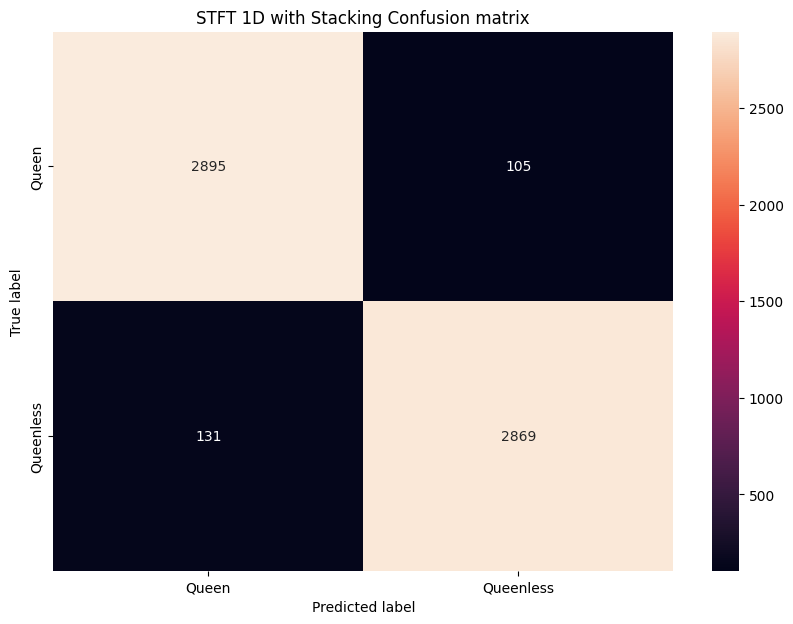

In [19]:
plot_confusion_matrix(cf_matrix, 'STFT 1D with Stacking Confusion matrix')

In [22]:
def plot_roc_curve(Y_test, Y_pred_proba, title):
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba[:,1])

    aucc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label="ROC curve (area = {0:.2f})".format(aucc))
    plt.plot([0, 1], [0, 1], linestyle="dashed")
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.savefig(title + ".png")
    # plt.show()

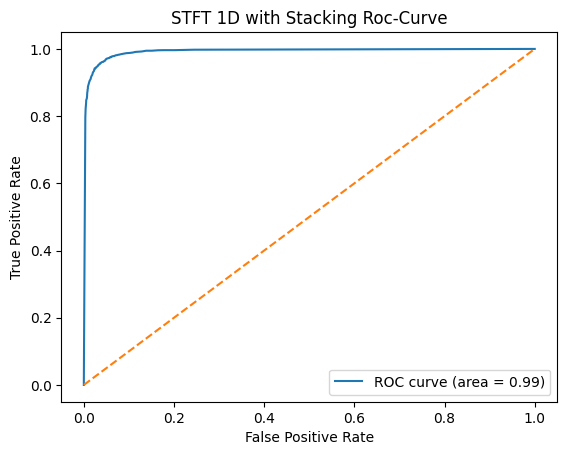

In [23]:
plot_roc_curve(Y_test, Y_pred_proba, "STFT 1D with Stacking Roc-Curve")

In [24]:
os.chdir(os.path.join(os.getcwd(), 'model'))
import pickle

# save 
with open('STFT_with_StackingClassifier.pkl', 'wb') as f:
    pickle.dump(clf, f)